## EDA

In [97]:
# import modules

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [98]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [99]:
df_train

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000
...,...,...,...,...,...,...,...,...,...,...,...
1010,1010,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2014,5415000
1011,1011,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Silver,2011,3615000
1012,1012,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2011,3415000
1013,1013,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Gold,2013,14315000


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB


#### Categorical variable 다루기

In [101]:
cat_features = df_train.describe(include='object').columns
cat_features

Index(['title', 'location', 'isimported', 'engine', 'transmission', 'fuel',
       'paint'],
      dtype='object')

- title 에서 brand만 추출해서 category를 줄이는 작업이 필요함
- paint도 category 줄이는 작업 필요함

In [102]:
df_train.describe(include='object')

,title,location,isimported,engine,transmission,fuel,paint
count,1015,1015,1015,1015,1015,1015,1015
unique,203,13,3,8,2,2,76
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,129,792,744,618,965,970,292


In [103]:
# 자동차 판매수가 5대 이하인 브랜드는 기타 브랜드(etc)로 간주함

df_train['brand'] = df_train['title'].apply(lambda x: x.split(' ')[0])
df_train.head(5)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [104]:
bottom_brand = df_train['brand'].value_counts().loc[lambda x: x <= 5].index

df_train.replace(bottom_brand, 'etc', inplace=True)
df_train['brand'].unique()

array(['Toyota', 'Land', 'Lexus', 'etc', 'Ford', 'Honda', 'Volvo', 'BMW',
       'Mercedes-Benz', 'Hyundai', 'Nissan', 'Mack', 'Mazda', 'Kia',
       'Volkswagen', 'Acura'], dtype=object)

In [105]:
def clean_txt(txt):
    corpus = []

    for i in range(len(txt)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',txt[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review)

    return corpus

In [106]:
temp = clean_txt(df_train['paint'])
df_train['paint'] = temp

df_train['paint'].value_counts()

black                     310
white                     144
silver                    109
grey                       87
blue                       78
red                        58
dark grey                  48
gold                       41
green                      20
gray                       18
dark blue                  17
brown                      16
wine                        9
sliver                      5
dark ash                    4
cream                       4
ash                         3
purple                      3
yellow                      3
whiteblue                   2
dark gray                   2
maroon                      2
sky blue                    2
milk                        2
deep blue                   2
navy blue                   1
pale brown                  1
ash and black               1
magnetic gray metallic      1
skye blue                   1
off white                   1
black sand pearl            1
light silver                1
black and 

- paint도 brand와 동일하게 5이하인 색은 기타(etc)로 변환
- redl, off white l은 오타이기 때문에 각각 red, white로 변경

In [107]:
df_train.replace('redl', 'red', inplace=True)
df_train.replace('off white l', 'white', inplace=True)
df_train['paint'].value_counts()

black                     310
white                     145
silver                    109
grey                       87
blue                       78
red                        59
dark grey                  48
gold                       41
green                      20
gray                       18
dark blue                  17
brown                      16
wine                        9
sliver                      5
dark ash                    4
cream                       4
purple                      3
ash                         3
yellow                      3
whiteblue                   2
maroon                      2
sky blue                    2
dark gray                   2
milk                        2
deep blue                   2
navy blue                   1
pale brown                  1
ash and black               1
magnetic gray metallic      1
off white                   1
black sand pearl            1
light silver                1
black and silver            1
whine     

In [108]:
bottom_paint = df_train['paint'].value_counts().loc[lambda x: x <= 5].index

df_train.replace(bottom_paint, 'etc', inplace=True)
df_train['paint'].value_counts()

black        310
white        145
silver       109
grey          87
blue          78
red           59
etc           58
dark grey     48
gold          41
green         20
gray          18
dark blue     17
brown         16
wine           9
Name: paint, dtype: int64

In [109]:
df_train.describe(include='object')

,title,location,isimported,engine,transmission,fuel,paint,brand
count,1015,1015,1015,1015,1015,1015,1015,1015
unique,203,13,3,8,2,2,14,16
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,Toyota
freq,129,792,744,618,965,970,310,474


In [110]:
# id, title은 제외

df_train.drop(columns=['title', 'id'], inplace=True)
df_train

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,Toyota
1,10,Lagos,New,4-cylinder(I4),automatic,petrol,black,2019,33015000,Toyota
2,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,Land
3,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,gray,2007,3815000,Lexus
4,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,Toyota
...,...,...,...,...,...,...,...,...,...,...
1010,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2014,5415000,Toyota
1011,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,silver,2011,3615000,Toyota
1012,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,black,2011,3415000,Toyota
1013,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,gold,2013,14315000,Lexus


In [114]:
# one=hot encoding

df_train_encoded = pd.get_dummies(df_train)
df_train_encoded

,odometer,year,target,location_Abia,location_Abia State,location_Abuja,location_Abuja,location_Accra,location_Adamawa,location_FCT,...,brand_Land,brand_Lexus,brand_Mack,brand_Mazda,brand_Mercedes-Benz,brand_Nissan,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_etc
0,18277,2016,13665000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,10,2019,33015000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,83091,2012,9915000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,91524,2007,3815000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,94177,2010,7385000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,46768,2014,5415000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1011,31600,2011,3615000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1012,96802,2011,3415000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1013,146275,2013,14315000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### numerical variable 확인

In [115]:
# odometer == 0을 mean값으로 대체

df_train_encoded[df_train_encoded['odometer'] == 0]

,odometer,year,target,location_Abia,location_Abia State,location_Abuja,location_Abuja,location_Accra,location_Adamawa,location_FCT,...,brand_Land,brand_Lexus,brand_Mack,brand_Mazda,brand_Mercedes-Benz,brand_Nissan,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_etc
52,0,2006,5535000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
121,0,2004,8515000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
134,0,2006,3015000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
176,0,2003,2890000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,0,2018,18515000,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
301,0,1999,5360000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
351,0,1996,6915000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
352,0,2014,16690000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
372,0,2003,1715000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
383,0,1995,8015000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
odo_mean = int(df_train_encoded.odometer.mean())

df_train_encoded.replace({'odometer':0}, odo_mean, inplace=True)
df_train_encoded

,odometer,year,target,location_Abia,location_Abia State,location_Abuja,location_Abuja,location_Accra,location_Adamawa,location_FCT,...,brand_Land,brand_Lexus,brand_Mack,brand_Mazda,brand_Mercedes-Benz,brand_Nissan,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_etc
0,18277,2016,13665000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,10,2019,33015000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,83091,2012,9915000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,91524,2007,3815000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,94177,2010,7385000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,46768,2014,5415000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1011,31600,2011,3615000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1012,96802,2011,3415000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1013,146275,2013,14315000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


- year의 경우 1217과 같은 오탈자가 있기 때문에 1900 이상만 사용

In [119]:
df_train_encoded.year.value_counts()

2008    82
2013    73
2010    71
2016    70
2014    68
2007    68
2011    59
2009    57
2012    56
2006    56
2018    47
2015    45
2005    44
2004    36
2003    34
2017    29
2001    21
2019    17
2002    17
2020    17
2000    12
1999    10
1996     7
1998     5
1995     3
1994     3
1991     2
1985     1
1218     1
1982     1
1997     1
1217     1
1980     1
Name: year, dtype: int64

In [120]:
df_train_encoded = df_train_encoded[df_train_encoded['year'] > 1900]
df_train_encoded.shape

(1013, 61)

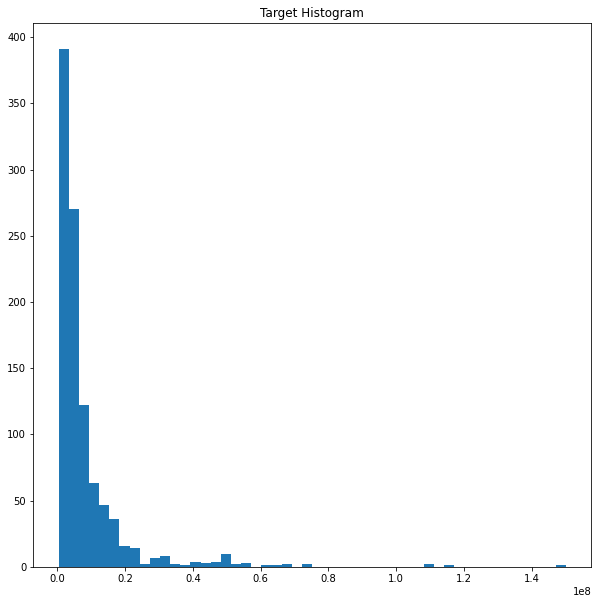

In [63]:
# target변수 확인

plt.figure(figsize=(10, 10))
plt.hist(df_train['target'], bins=50)
plt.title('Target Histogram')
plt.show()

- target variable이 오른쪽 긴꼬리분포를 띔
    - 따라서 normalization이 필요함

In [10]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

In [12]:
y_std = scaler_standard.fit(df_train['target'])
y_std

ValueError: Expected 2D array, got 1D array instead:
array=[13665000. 33015000.  9915000. ...  3415000. 14315000. 10015000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.